## Preprocessing on the real-world database

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
df = pd.read_csv(path, header=None)

- 41 minority (oil slick)
- 896 majority (no oil slick)

In [2]:
df.shape

(937, 50)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       937 non-null    int64  
 1   1       937 non-null    int64  
 2   2       937 non-null    float64
 3   3       937 non-null    float64
 4   4       937 non-null    int64  
 5   5       937 non-null    float64
 6   6       937 non-null    float64
 7   7       937 non-null    float64
 8   8       937 non-null    float64
 9   9       937 non-null    float64
 10  10      937 non-null    float64
 11  11      937 non-null    float64
 12  12      937 non-null    float64
 13  13      937 non-null    float64
 14  14      937 non-null    float64
 15  15      937 non-null    float64
 16  16      937 non-null    float64
 17  17      937 non-null    float64
 18  18      937 non-null    float64
 19  19      937 non-null    float64
 20  20      937 non-null    float64
 21  21      937 non-null    float64
 22  22

In [5]:
# check for any missing values
print(df.isna().any().any())

False


In [6]:
# should those min values be 0 or should we impute?
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [7]:
X = df.drop(columns=[49])
y = df[49]

In [8]:
X.shape, y.shape

((937, 49), (937,))

In [9]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: 49, dtype: int64

In [10]:
# see target value - what type of classification we deal with
y.value_counts()

49
0    896
1     41
Name: count, dtype: int64

In [11]:
# replace zeros with nan for easier imputing
import numpy as np
X.replace(0.000000, np.nan, inplace=True)
print(X.isnull().sum())

0       0
1       0
2       0
3       0
4       6
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22    937
23      0
24      0
25      0
26      0
27      2
28      0
29      0
30      7
31      7
32    933
33      7
34      0
35      0
36    324
37      0
38      0
39      0
40     72
41     86
42     86
43    111
44     86
45    817
46      0
47      0
48      0
dtype: int64


In [12]:
# summarize the number of unique values in each column
print(X.nunique())

0     238
1     297
2     927
3     933
4     178
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      0
23     92
24      9
25      8
26      9
27    307
28    447
29    392
30    106
31     41
32      3
33     44
34    141
35    110
36      2
37    758
38      9
39      9
40    387
41    219
42    643
43    648
44    498
45      1
46    937
47    169
48    286
dtype: int64


### data cleaning

In [13]:
# Count number of distinct elements in specified axis.
counts = X.nunique()
# drop columns that have few distinct numerical values
to_del = [i for i,v in enumerate(counts) if v < 2]
print(to_del)

[22, 45]


In [14]:
# drop useless columns
X.drop(to_del, axis=1, inplace=True)
print(X.shape)

(937, 47)


In [15]:
# calculate duplicates
dups = X.duplicated()
# report if there are any duplicates
print(dups.any())

False


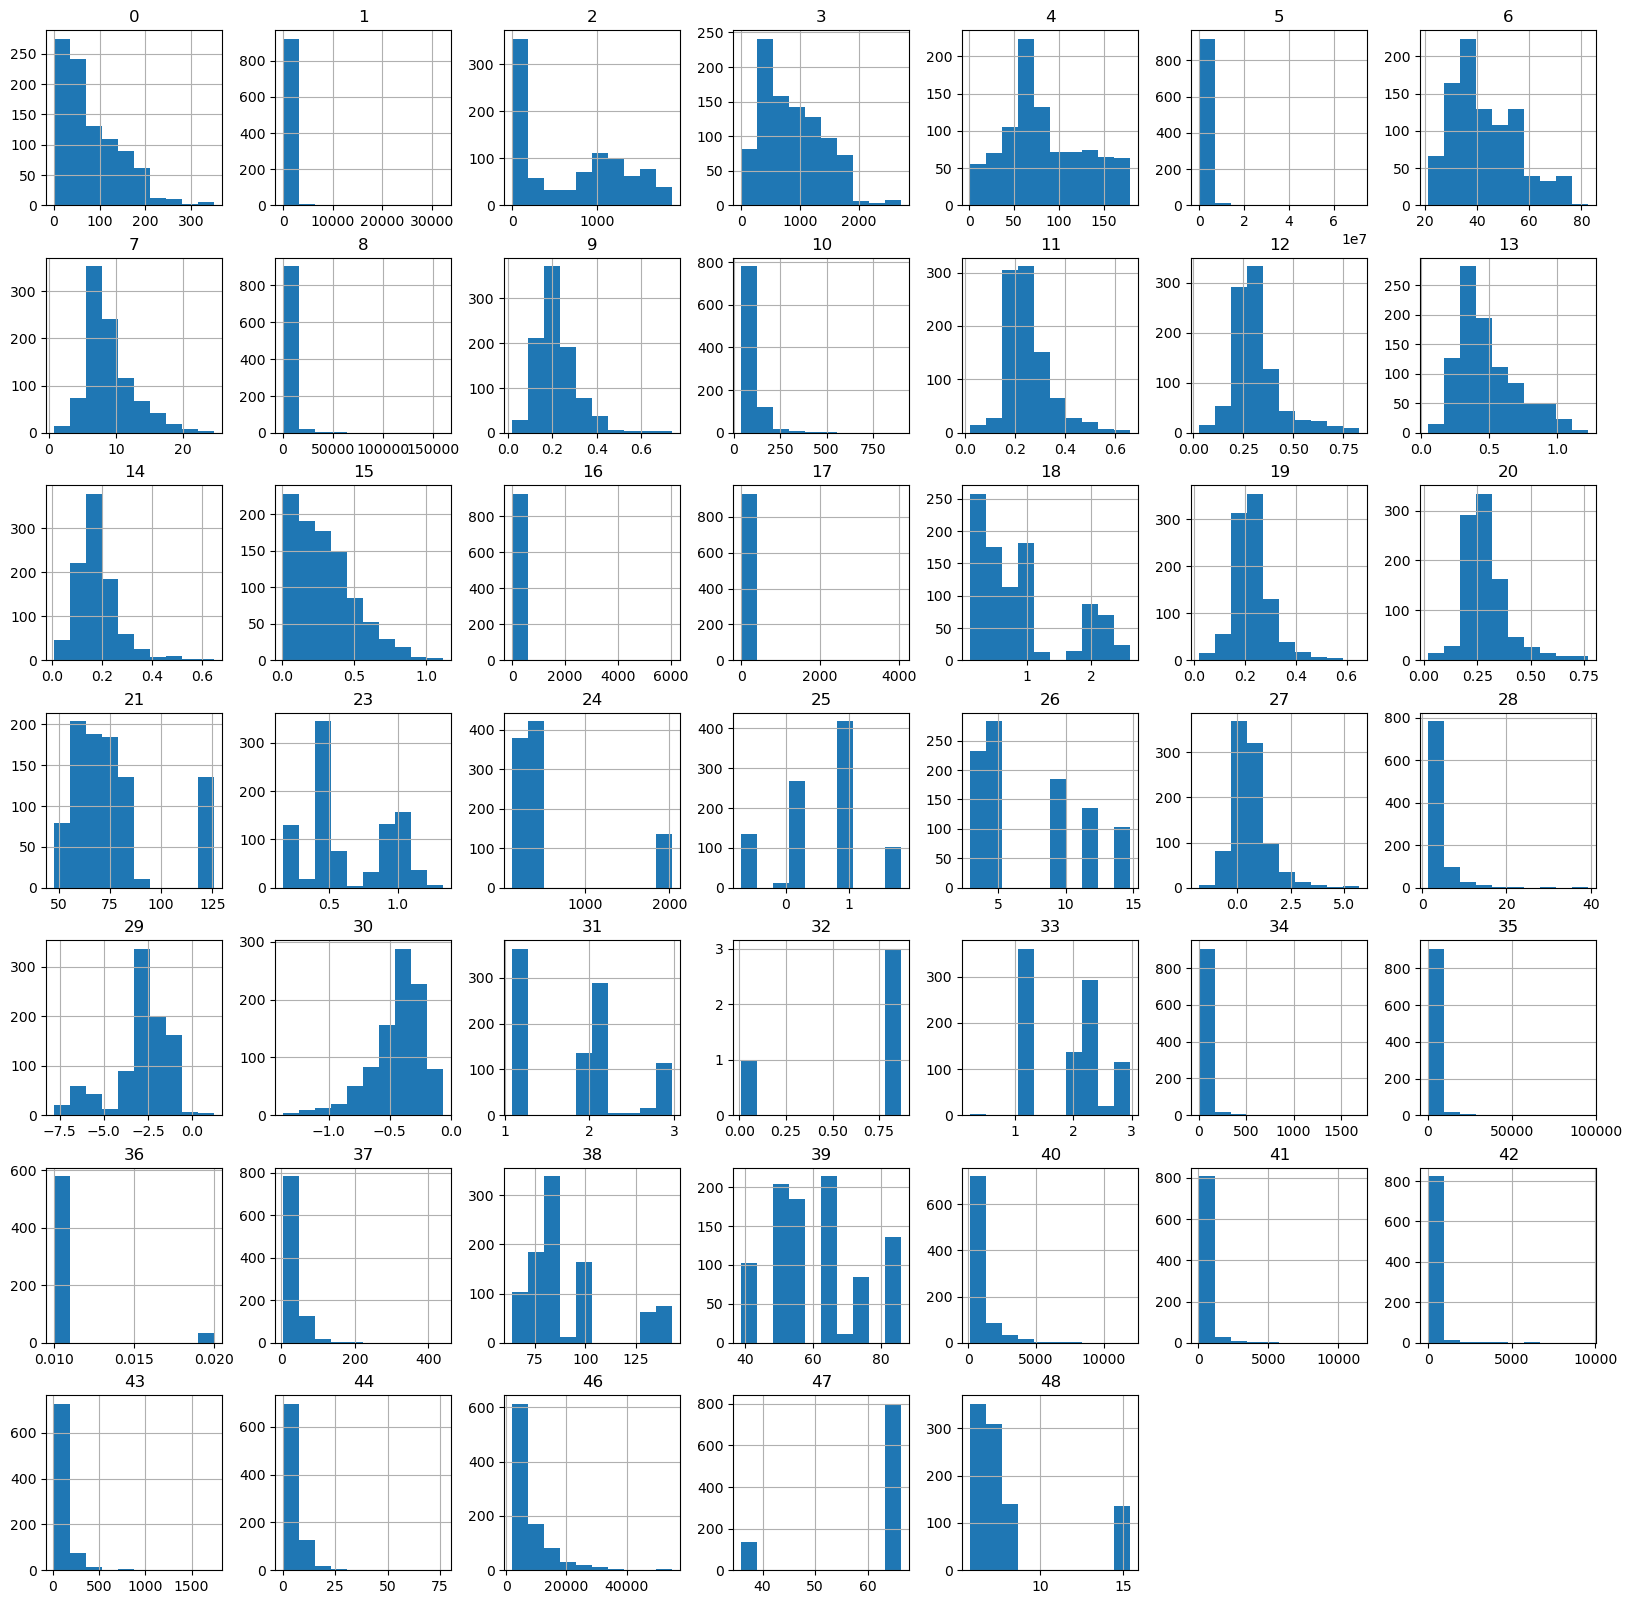

In [16]:
p = X.hist(figsize = (20,20))

## Data imputation
Imputing strategies:
- skewed distribution - median
- normal distribuiton - mean
https://www.clinfo.eu/mean-median/

In [17]:
mean = X.mean()
median = X.median()
pd.concat([mean.rename('mean'), median.rename('median')], axis=1)

,mean,median
0,81.588047,64.000
1,332.842049,65.000
2,698.707086,704.370
3,870.992209,761.280
4,84.663802,73.000
5,769696.378869,186300.000
6,43.242721,39.970
7,9.127887,8.200
8,3940.712914,2090.000
9,0.221003,0.200


In [18]:
_cols = [1,5,16,17,34,35,42]
X_mean = X.drop(columns=_cols, axis=1)
X_median = X.drop(columns=[x for x in X.columns if x not in _cols])
print(X_mean.columns, X_median.columns)

Index([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43,
       44, 46, 47, 48],
      dtype='int64') Index([1, 5, 16, 17, 34, 35, 42], dtype='int64')


In [19]:
# fillna()
X_mean[0].fillna(X_mean[0].mean(), inplace = True)
X_median[1].fillna(X_median[1].median(), inplace = True)
pd.concat([X_mean[0].describe(), X_median[1].describe()], axis=1)

,0,1
count,937.000000,937.000000
mean,81.588047,332.842049
std,64.976730,1931.938570
min,1.000000,10.000000
25%,31.000000,20.000000
50%,64.000000,65.000000
75%,124.000000,132.000000
max,352.000000,32389.000000


In [20]:
from sklearn.impute import SimpleImputer
# Simple Imputer

X_imp_mean = pd.DataFrame(X_mean[2])
X_imp_median = pd.DataFrame(X_median[5])


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')


X_imp_mean = pd.DataFrame(imp_mean.fit_transform(X_imp_mean))
X_imp_median = pd.DataFrame(imp_median.fit_transform(X_imp_median))

In [21]:
pd.concat([X_imp_mean.describe(), X_imp_median.describe()], axis=1)

,0,0
count,937.000000,9.370000e+02
mean,698.707086,7.696964e+05
std,599.965577,3.831151e+06
min,1.920000,7.031200e+04
25%,85.270000,1.250000e+05
50%,704.370000,1.863000e+05
75%,1223.480000,3.304680e+05
max,1893.080000,7.131500e+07


In [22]:
# KNN Imputer 
from sklearn.impute import KNNImputer

X_knn = pd.DataFrame(X_mean[3])
imp_knn = KNNImputer(n_neighbors=3, weights="uniform")

X_knn = pd.DataFrame(imp_knn.fit_transform(X_knn))
X_knn.describe()

,0
count,937.000000
mean,870.992209
std,522.799325
min,1.000000
25%,444.200000
50%,761.280000
75%,1260.370000
max,2724.570000


## Preprocessing
#### Feature Scaling:
- standarization
- normalization

<Axes: >

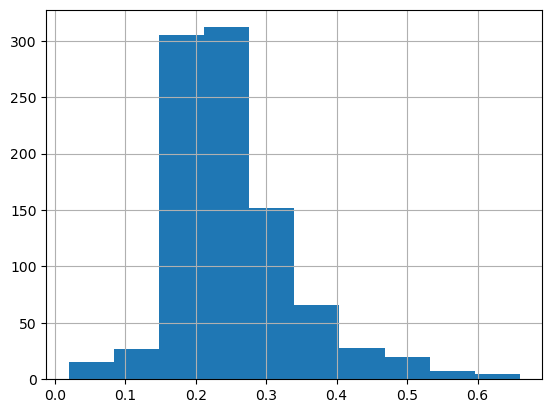

In [23]:
# many outliers or gaussian distribution -> standarization
# unknown distribution or not gaussian -> normalization
from sklearn.preprocessing import StandardScaler
X[11].hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

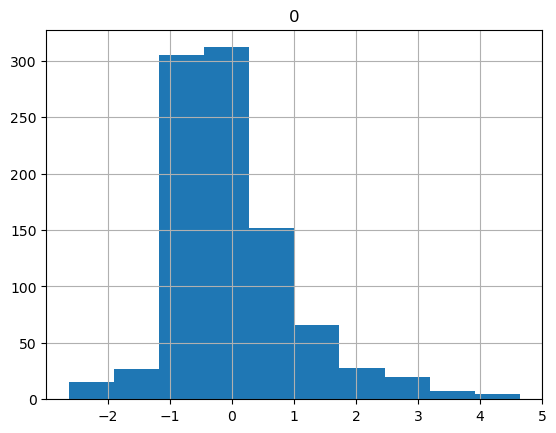

In [24]:
stand = StandardScaler()
X_stand = pd.DataFrame(stand.fit_transform(pd.DataFrame(X[11])))
X_stand.hist()

<Axes: >

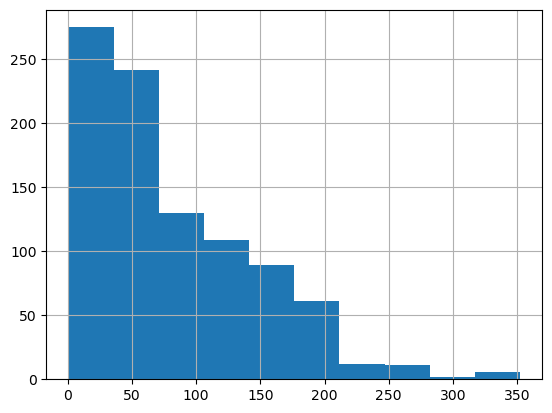

In [25]:
# change scale of data
from sklearn.preprocessing import MinMaxScaler
X[0].hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

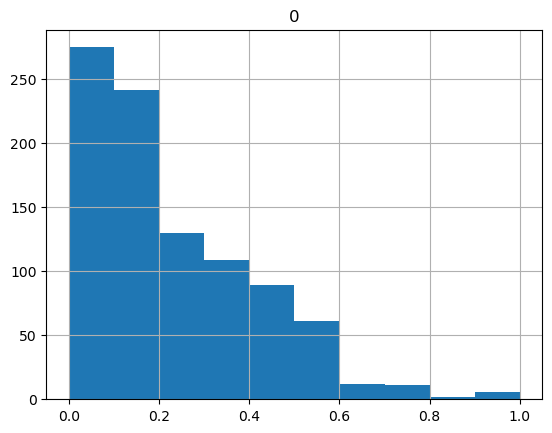

In [26]:
norm = MinMaxScaler()
X_norm = pd.DataFrame(norm.fit_transform(pd.DataFrame(X[0])))
X_norm.hist()

- Ordinal Encoding
- One-Hot Encoding

In [27]:
import numpy as np
# Generate synthetic data
np.random.seed(42)
data = {
    'some_feature_1': np.random.randint(1, 100, size=100),
    'some_feature_2': np.random.randint(1, 100, size=100),
    'size': np.random.choice(['small', 'medium', 'large'], size=100),
    'color': np.random.choice(['white', 'black', 'blue'], size=100),
    'bought': np.random.choice([0, 1], size=100)
}
synth = pd.DataFrame(data)
synth.head()

,some_feature_1,some_feature_2,size,color,bought
0,52,60,small,blue,0
1,93,41,small,white,1
2,15,29,large,white,0
3,72,15,medium,black,1
4,61,45,large,black,0


In [28]:
# ordinal -> order matters, e.g. salary = [high, mid, low]
# one-hot -> every value has the same importance e.g. colors = [blue, green, red]
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ord = OrdinalEncoder()
synth['size'] = ord.fit_transform(synth[['size']])
synth.head()

,some_feature_1,some_feature_2,size,color,bought
0,52,60,2.0,blue,0
1,93,41,2.0,white,1
2,15,29,0.0,white,0
3,72,15,1.0,black,1
4,61,45,0.0,black,0


In [29]:
# one-hot encoded feature
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(synth[['color']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['color']))
encoded_df.head()

,color_black,color_blue,color_white
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [30]:
# final dataset
synth = pd.concat([synth, encoded_df], axis=1)
synth.drop(columns=['color'], inplace=True)
synth.head()

,some_feature_1,some_feature_2,size,bought,color_black,color_blue,color_white
0,52,60,2.0,0,0.0,1.0,0.0
1,93,41,2.0,1,0.0,0.0,1.0
2,15,29,0.0,0,0.0,0.0,1.0
3,72,15,1.0,1,1.0,0.0,0.0
4,61,45,0.0,0,1.0,0.0,0.0


#### More resources:
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing